In [4]:
import pandas as pd
import numpy as np

In [5]:
data_path='/Users/haixiangliu/Documents/水质数据及代码模型/water_clean_data.csv'

In [6]:
df = pd.DataFrame(pd.read_csv(data_path))

In [7]:
df=df.rename(columns={'时间日期':'datetime', '液位':'water_level', 'DO':'do', 'MISS':'miss', '进风流量':'input_wind_throughput', '进气阀开度':'input_wind_openness', 'ts':'ts','进水COD':'input_water_cod', '出水COD':'output_water_cod', '进水氨氮':'input_water_ammonia', '出水总氮':'output_water_ammonia', '进水PH值':'input_water_ph','出水总磷':'output_water_phosphorus','进水SS':'input_water_ss','出水SS':'output_water_ss'})

In [8]:
#描述
df.describe()

,water_level,do,miss,input_wind_throughput,input_wind_openness,ts,input_water_cod,output_water_cod,input_water_ammonia,output_water_ammonia,input_water_ph,output_water_phosphorus,input_water_ss,output_water_ss
count,34024.000000,34024.000000,34024.000000,34035.000000,34035.000000,3.403500e+04,34035.000000,34035.000000,34035.000000,34035.000000,34035.000000,34035.000000,34035.000000,34035.000000
mean,5.229836,0.636292,3516.282242,1796.653739,46.740620,1.402362e+09,267.427530,16.015131,34.131039,-6.738416,7.077556,-0.293184,374.066843,5.139180
std,0.457183,1.151433,3227.756050,2296.794793,49.835435,5.854110e+07,146.413104,5.670968,10.554799,7.072431,2.503650,0.281792,678.153800,2.200128
min,-1.750000,-3.800000,-1875.000000,-13.000000,-19.000000,1.278745e+09,2.000000,1.000000,-22.500000,-258.000000,-2.630000,-0.380000,-375.000000,-19.000000
25%,5.020000,0.100000,94.000000,0.000000,0.000000,1.356034e+09,190.000000,13.000000,28.900000,-9.000000,7.220000,-0.380000,-375.000000,4.000000
50%,5.480000,0.300000,3404.500000,0.000000,0.000000,1.418692e+09,235.000000,16.000000,34.300000,-9.000000,7.450000,-0.380000,331.000000,5.000000
75%,5.500000,0.600000,6105.000000,4250.000000,100.000000,1.451900e+09,303.000000,18.000000,39.800000,-9.000000,7.770000,-0.380000,835.000000,6.000000
max,6.050000,18.500000,10055.000000,8464.000000,100.000000,1.484806e+09,2007.000000,116.000000,121.200000,58.000000,14.050000,2.310000,2027.000000,100.000000


In [12]:
#针对每一列进行统计
def data_profiling(column):
    #不重复的值
    distinct_count=df[column].unique().size
    #唯一值概率
    unique=distinct_count/df[column].size*100
    unique=np.round(unique,2)
    #最大值
    maxnum=df[column].max()
    #最小值
    minnum=df[column].min()
    #均值
    mean=df[column].mean()
    mean = np.round(mean,4)
    #缺失值
    miss=df[column].size-df[column].count()
    miss1=np.round(miss/df[column].size,2)
    #判断是否有无穷值
    infnum=0
    for d in np.isinf(df[column]).iteritems():
        if d==True :
            infnum=infnum+1
    infnum1=np.round(infnum/df[column].size,2)
    print('\n\n'+column.upper()+' : '+'\n')
    print('Distinct count : '+str(distinct_count) +'\t\t'+'Missing(%) : '+str(miss1)+'%'+'\n'+'Unique(%) : '+str(unique)+'%'+'\t\t'+'Missing(n) : '+str(miss)+'\n'+'Infinite (%) : '+str(infnum1)+'%'+'\t\t'+'Mean : '+str(mean)+'\n'+'Infinite (n) : '+str(infnum)+'\n'+'Maxnum : '+str(maxnum)+'\n'+'Minnum : '+str(minnum))
   #图覆盖？----for循环中的图只输出最后一个
    return df[column].hist().set_title(column)
    

In [13]:
#针对整个DataFrame进行调用
def fun(df):
        for  column in df:
            if column !='datetime':
                data_profiling(column)
            else:
                print(column)    

datetime


WATER_LEVEL : 

Distinct count : 284		Missing(%) : 0.0%
Unique(%) : 0.83%		Missing(n) : 11
Infinite (%) : 0.0%		Mean : 5.2298
Infinite (n) : 0
Maxnum : 6.05
Minnum : -1.75


DO : 

Distinct count : 138		Missing(%) : 0.0%
Unique(%) : 0.41%		Missing(n) : 11
Infinite (%) : 0.0%		Mean : 0.6363
Infinite (n) : 0
Maxnum : 18.5
Minnum : -3.8


MISS : 

Distinct count : 8697		Missing(%) : 0.0%
Unique(%) : 25.55%		Missing(n) : 11
Infinite (%) : 0.0%		Mean : 3516.2822
Infinite (n) : 0
Maxnum : 10055.0
Minnum : -1875.0


INPUT_WIND_THROUGHPUT : 

Distinct count : 3813		Missing(%) : 0.0%
Unique(%) : 11.2%		Missing(n) : 0
Infinite (%) : 0.0%		Mean : 1796.6537
Infinite (n) : 0
Maxnum : 8464
Minnum : -13


INPUT_WIND_OPENNESS : 

Distinct count : 66		Missing(%) : 0.0%
Unique(%) : 0.19%		Missing(n) : 0
Infinite (%) : 0.0%		Mean : 46.7406
Infinite (n) : 0
Maxnum : 100
Minnum : -19


TS : 

Distinct count : 34035		Missing(%) : 0.0%
Unique(%) : 100.0%		Missing(n) : 0
Infinite (%) : 0.0%		Mean :

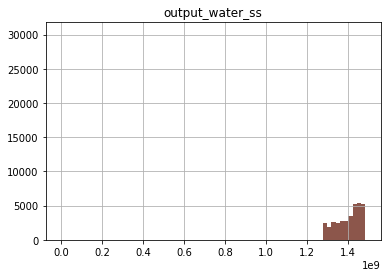

In [14]:
fun(df)

### 数据清洗

In [15]:
df[['input_wind_throughput','input_wind_openness','input_water_cod','output_water_cod','output_water_ammonia','input_water_ss','output_water_ss']]=df[['input_wind_throughput','input_wind_openness','input_water_cod','output_water_cod','output_water_ammonia','input_water_ss','output_water_ss']].astype(float)

In [21]:
#利用重建索引给output_water_cod列加标签
index_array=[]
for d in df['output_water_cod']:
    if d>=50:
        index_array.append(1)
    else:
        index_array.append(0)
df=df.reindex(index_array)